<a href="https://colab.research.google.com/github/chsachin799/100-days-of-ML/blob/main/37_Handling_Missing_Categorial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('/content/train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [8]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [9]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0, 0.5, 'Number of houses')

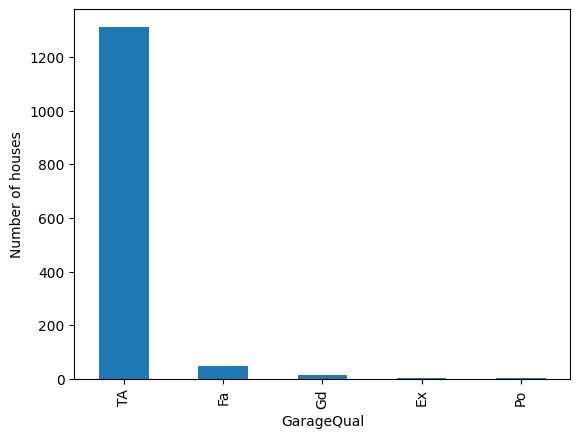

In [13]:
df['GarageQual'].value_counts().plot(kind='bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [14]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

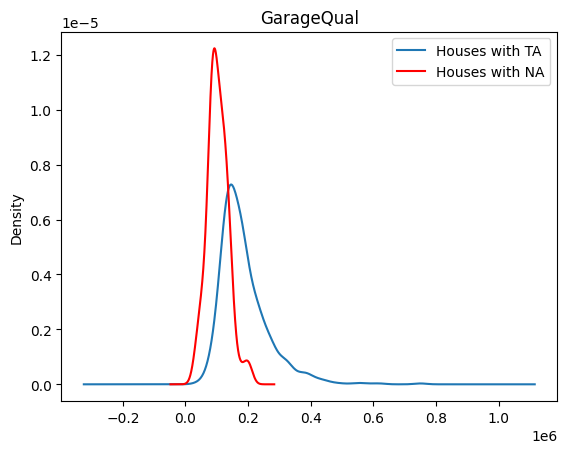

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [17]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA',inplace=True)

/tmp/ipython-input-1166703391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

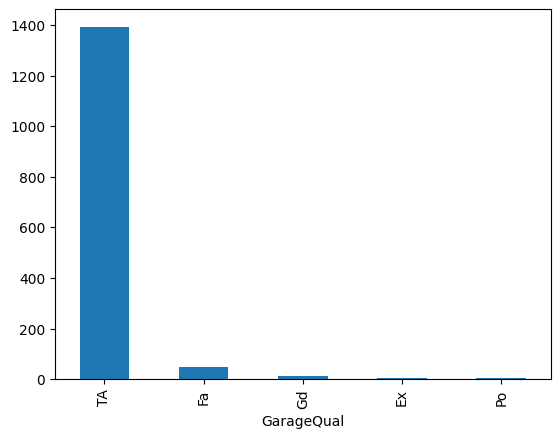

In [18]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

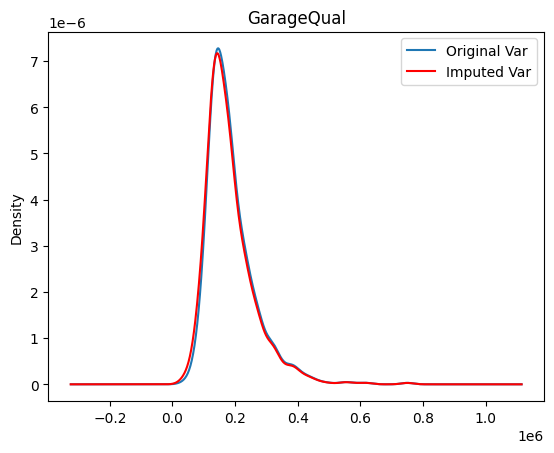

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')


lines,labels = ax.get_legend_handles_labels()
labels = ['Original Var ','Imputed Var']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2,random_state=42)


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)


In [38]:
imputer.statistics_

array(['Gd', 'TA', 'TA'], dtype=object)

Applying **MISSING **

In [34]:
df['copied'] = df['GarageQual']

In [35]:
df.sample(2)

,FireplaceQu,GarageQual,SalePrice,copied
788,NaN,Fa,107900,Fa
1406,NaN,TA,133000,TA


In [25]:
df['copied'].fillna('Missing',inplace=True)

/tmp/ipython-input-1341544407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['copied'].fillna('Missing',inplace=True)
